<a href="https://colab.research.google.com/github/tomasz-soltysiak/Fraud_transaction/blob/master/Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,roc_curve,confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
! pip install joblib
from joblib import dump, load

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data Science/ML fraud detection/test.csv')
df['scaled_time']=round((df['Time']/3600)%24)
Rob_scaler = RobustScaler()
df['scaled_Amount']=Rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Time','Amount'],axis=1)
X_test = df.drop(columns=['Class'])
y_test = df['Class']

In [0]:
def performance_of_models(x, y, list_of_models):
    results = [model_summary(model, x, y) for model in list_of_models]
    results = pd.DataFrame(results)
    return results

In [0]:
def model_summary(model, X_test, y_test):
  
  y_pred=model.predict(X_test)

  cnf_matrix = confusion_matrix(y_test, y_pred)
  precision=precision_score(y_test,y_pred)
  accuracy=accuracy_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  auc=roc_auc_score(y_test, y_pred)
  fpr, tpr, trashhold = roc_curve(y_test,  y_pred)

  result = {'model': str(model),
            'confusion matrix': cnf_matrix,
            'precision': precision,
            'accuracy': accuracy,
            'recall': recall,
            'f1 score': f1,
            'auc': auc,
            'fpr': fpr,
            'tpr': tpr,
            'trashhold': trashhold,
               }

  return result

In [0]:
usmpl_LR = load('/content/usmpl_Log_Reg.pkl')
usmpl_RF = load('/content/usmpl_Rand_forest.pkl')
usmpl_XGB = load('/content/usmpl_XGBoost_.pkl')
# usmpl_eclf = load('/content/usmpl_eclf.pkl')
osmpl_LR = load('/content/osmpl_Log_Reg.pkl')
osmpl_RF = load('/content/osmpl_Rand_forest.pkl')
osmpl_XGB = load('/content/osmpl_XGBoost_.pkl')
osmpl_SVC = load('/content/osmpl_SVC_.pkl')
# osmpl_eclf = load('/content/osmpl_eclf.pkl')
SMOTE_LR = load('/content/SMOTE_Log_Reg.pkl')
SMOTE_RF = load('/content/SMOTE_Rand_forest.pkl')
SMOTE_XGB = load('/content/SMOTE_XGBoost_.pkl')
SMOTE_SVC = load('/content/SMOTE_SVC_.pkl')
# SMOTE_eclf = load('/content/SMOTE_eclf.pkl')

In [16]:
list_of_models = [usmpl_LR,
usmpl_RF,
usmpl_XGB,
osmpl_LR, 
osmpl_RF,
osmpl_XGB,
osmpl_SVC,
SMOTE_LR,
SMOTE_RF,
SMOTE_XGB,
SMOTE_SVC,]
a = performance_of_models(X_test, y_test, list_of_models)
a

,model,confusion matrix,precision,accuracy,recall,f1 score,auc,fpr,tpr,trashhold
0,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1170, 69909], [0, 123]]",0.001756,0.018160,1.0,0.003507,0.508230,"[0.0, 0.9835394420292913, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
1,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1485, 69594], [0, 123]]",0.001764,0.022584,1.0,0.003522,0.510446,"[0.0, 0.9791077533448698, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
2,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1170, 69909], [0, 123]]",0.001756,0.018160,1.0,0.003507,0.508230,"[0.0, 0.9835394420292913, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
3,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1170, 69909], [0, 123]]",0.001756,0.018160,1.0,0.003507,0.508230,"[0.0, 0.9835394420292913, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
4,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1170, 69909], [0, 123]]",0.001756,0.018160,1.0,0.003507,0.508230,"[0.0, 0.9835394420292913, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
5,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1170, 69909], [0, 123]]",0.001756,0.018160,1.0,0.003507,0.508230,"[0.0, 0.9835394420292913, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
6,"GridSearchCV(cv='warn', error_score='raise-dep...","[[416, 70663], [0, 123]]",0.001738,0.007570,1.0,0.003469,0.502926,"[0.0, 0.9941473571659702, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
7,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1170, 69909], [0, 123]]",0.001756,0.018160,1.0,0.003507,0.508230,"[0.0, 0.9835394420292913, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
8,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1213, 69866], [0, 123]]",0.001757,0.018764,1.0,0.003509,0.508533,"[0.0, 0.9829344813517354, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"
9,"GridSearchCV(cv='warn', error_score='raise-dep...","[[1170, 69909], [0, 123]]",0.001756,0.018160,1.0,0.003507,0.508230,"[0.0, 0.9835394420292913, 1.0]","[0.0, 1.0, 1.0]","[2, 1, 0]"


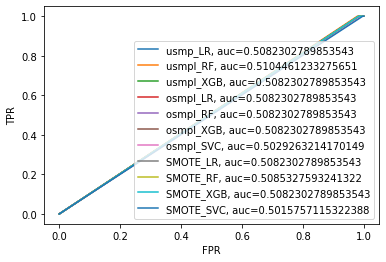

'[usmpl_LR,\nusmpl_RF,\nusmpl_XGB,\nosmpl_LR, \nosmpl_RF,\nosmpl_XGB,\nosmpl_SVC,\nSMOTE_LR,\nSMOTE_RF,\nSMOTE_XGB,\nSMOTE_SVC,]'

In [20]:
plt.plot(a.iloc[0,7],a.iloc[0,8],label="usmp_LR, auc="+str(a.iloc[0,6]))
plt.plot(a.iloc[1,7],a.iloc[1,8],label="usmpl_RF, auc="+str(a.iloc[1,6]))
plt.plot(a.iloc[2,7],a.iloc[2,8],label="usmpl_XGB, auc="+str(a.iloc[2,6]))
plt.plot(a.iloc[3,7],a.iloc[3,8],label="osmpl_LR, auc="+str(a.iloc[3,6]))
plt.plot(a.iloc[4,7],a.iloc[4,8],label="osmpl_RF, auc="+str(a.iloc[4,6]))
plt.plot(a.iloc[5,7],a.iloc[5,8],label="osmpl_XGB, auc="+str(a.iloc[5,6]))
plt.plot(a.iloc[6,7],a.iloc[6,8],label="osmpl_SVC, auc="+str(a.iloc[6,6]))
plt.plot(a.iloc[7,7],a.iloc[7,8],label="SMOTE_LR, auc="+str(a.iloc[7,6]))
plt.plot(a.iloc[8,7],a.iloc[8,8],label="SMOTE_RF, auc="+str(a.iloc[8,6]))
plt.plot(a.iloc[9,7],a.iloc[9,8],label="SMOTE_XGB, auc="+str(a.iloc[9,6]))
plt.plot(a.iloc[10,7],a.iloc[10,8],label="SMOTE_SVC, auc="+str(a.iloc[10,6]))
# plt.plot(a.iloc[11,7],a.iloc[11,8],label="Ensemble, auc="+str(a.iloc[11,6]))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()
"""[usmpl_LR,
usmpl_RF,
usmpl_XGB,
osmpl_LR, 
osmpl_RF,
osmpl_XGB,
osmpl_SVC,
SMOTE_LR,
SMOTE_RF,
SMOTE_XGB,
SMOTE_SVC,]"""

About optimizer
https://scikit-optimize.github.io/?fbclid=IwAR3m_0Um5EQ2v64DfXeSHmRPA8jBTu6inXHe8dFhOHMUDHBid-NpiH_8TH8